In [135]:
import os
from google.colab import drive
import random
import glob
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import itertools

# 1 Configuring Kaggle

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [27]:
!rm -fr ./data

In [28]:
!kaggle datasets download -d pratik2901/multiclass-weather-dataset --unzip

 65% 59.0M/91.4M [00:00<00:00, 312MB/s]
100% 91.4M/91.4M [00:00<00:00, 317MB/s]


### 1.1 Organizing data

In [29]:
os.mkdir("./data")
!mv Multi-class\ Weather\ Dataset ./data/weather_dataset

In [30]:
count = 1
for folder_name in os.listdir("./data/weather_dataset/"):
  for file_name in os.listdir(f"./data/weather_dataset/{folder_name}/"):
    source = f"./data/weather_dataset/{folder_name}/{file_name}"

    destination = f"./data/weather_dataset/{folder_name}/pic.{str(count)}.jpg"

    os.rename(source, destination)
    count += 1

os.listdir("./data/weather_dataset/Cloudy")

['pic.403.jpg',
 'pic.584.jpg',
 'pic.401.jpg',
 'pic.610.jpg',
 'pic.578.jpg',
 'pic.506.jpg',
 'pic.589.jpg',
 'pic.422.jpg',
 'pic.371.jpg',
 'pic.359.jpg',
 'pic.409.jpg',
 'pic.382.jpg',
 'pic.625.jpg',
 'pic.388.jpg',
 'pic.602.jpg',
 'pic.407.jpg',
 'pic.638.jpg',
 'pic.587.jpg',
 'pic.652.jpg',
 'pic.442.jpg',
 'pic.647.jpg',
 'pic.609.jpg',
 'pic.499.jpg',
 'pic.420.jpg',
 'pic.631.jpg',
 'pic.431.jpg',
 'pic.476.jpg',
 'pic.411.jpg',
 'pic.369.jpg',
 'pic.511.jpg',
 'pic.451.jpg',
 'pic.573.jpg',
 'pic.570.jpg',
 'pic.538.jpg',
 'pic.532.jpg',
 'pic.529.jpg',
 'pic.577.jpg',
 'pic.383.jpg',
 'pic.581.jpg',
 'pic.365.jpg',
 'pic.655.jpg',
 'pic.565.jpg',
 'pic.470.jpg',
 'pic.465.jpg',
 'pic.654.jpg',
 'pic.617.jpg',
 'pic.596.jpg',
 'pic.509.jpg',
 'pic.646.jpg',
 'pic.530.jpg',
 'pic.387.jpg',
 'pic.517.jpg',
 'pic.514.jpg',
 'pic.505.jpg',
 'pic.368.jpg',
 'pic.516.jpg',
 'pic.398.jpg',
 'pic.483.jpg',
 'pic.633.jpg',
 'pic.651.jpg',
 'pic.405.jpg',
 'pic.583.jpg',
 'pic.41

In [ ]:
os.chdir("./data/weather_dataset")
if os.path.isdir("/train/Cloudy") is False:
  os.makedirs("train/Cloudy")
  os.makedirs("train/Rain")
  os.makedirs("train/Shine")
  os.makedirs("train/Sunrise")
  os.makedirs("valid/Cloudy")
  os.makedirs("valid/Rain")
  os.makedirs("valid/Shine")
  os.makedirs("valid/Sunrise")
  os.makedirs("test/Cloudy")
  os.makedirs("test/Rain")
  os.makedirs("test/Shine")
  os.makedirs("test/Sunrise")

  for i in random.sample(glob.glob(f'Cloudy/pic*'), 72):
      shutil.move(i, f'train/Cloudy')
  for i in random.sample(glob.glob(f'Rain/pic*'), 72):
      shutil.move(i, f'train/Rain')
  for i in random.sample(glob.glob(f'Shine/pic*'), 72):
      shutil.move(i, f'train/Shine')
  for i in random.sample(glob.glob(f'Sunrise/pic*'), 72):
      shutil.move(i, f'train/Sunrise')

  for i in random.sample(glob.glob(f'Cloudy/pic*'), 72):
      shutil.move(i, f'valid/Cloudy')
  for i in random.sample(glob.glob(f'Rain/pic*'), 72):
      shutil.move(i, f'valid/Rain')
  for i in random.sample(glob.glob(f'Shine/pic*'), 72):
      shutil.move(i, f'valid/Shine')
  for i in random.sample(glob.glob(f'Sunrise/pic*'), 72):
      shutil.move(i, f'valid/Sunrise')

  for i in random.sample(glob.glob(f'Cloudy/pic*'), 72):
      shutil.move(i, f'test/Cloudy')
  for i in random.sample(glob.glob(f'Rain/pic*'), 72):
      shutil.move(i, f'test/Rain')
  for i in random.sample(glob.glob(f'Shine/pic*'), 72):
      shutil.move(i, f'test/Shine')
  for i in random.sample(glob.glob(f'Sunrise/pic*'), 72):
      shutil.move(i, f'test/Sunrise')

os.chdir("../../")

In [85]:
os.chdir("../../")

In [86]:
!rm -fr ./data/weather_dataset/Sunrise

In [87]:
os.listdir("./data/weather_dataset/")

['valid', 'test', 'train']

# 2 Creating model

In [113]:
train_path = "./data/weather_dataset/train"
valid_path = "./data/weather_dataset/valid"
test_path = "./data/weather_dataset/test"

In [114]:
train_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['Sunrise', 'Cloudy', 'Shine', 'Rain'], batch_size=10
)

valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['Sunrise', 'Cloudy', 'Shine', 'Rain'], batch_size=10
)

test_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), classes=['Sunrise', 'Cloudy', 'Shine', 'Rain'], batch_size=10
)

Found 751 images belonging to 4 classes.
Found 288 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [115]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [116]:
imgs, text_labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

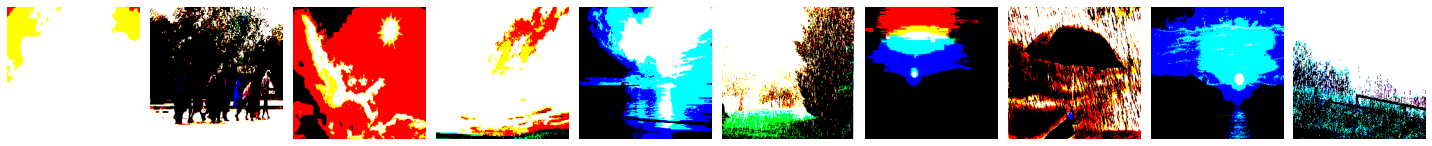

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [117]:
plotImages(imgs)
print(text_labels)

In [118]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3), padding="same"),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=4, activation="softmax")
])

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                

In [120]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [122]:
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=valid_batches, validation_steps=len(valid_batches), epochs=5, verbose=2)

Epoch 1/5
76/76 - 61s - loss: 0.0152 - accuracy: 0.9947 - val_loss: 2.9472 - val_accuracy: 0.8993 - 61s/epoch - 805ms/step
Epoch 2/5
76/76 - 61s - loss: 0.0091 - accuracy: 0.9960 - val_loss: 3.0580 - val_accuracy: 0.8889 - 61s/epoch - 801ms/step
Epoch 3/5
76/76 - 63s - loss: 0.0509 - accuracy: 0.9947 - val_loss: 3.3175 - val_accuracy: 0.8958 - 63s/epoch - 826ms/step
Epoch 4/5
76/76 - 61s - loss: 6.5011e-05 - accuracy: 1.0000 - val_loss: 3.3349 - val_accuracy: 0.8958 - 61s/epoch - 801ms/step
Epoch 5/5
76/76 - 61s - loss: 8.2707e-06 - accuracy: 1.0000 - val_loss: 3.3277 - val_accuracy: 0.8958 - 61s/epoch - 800ms/step


In [132]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[55 13  4]
 [ 0  0  0]
 [ 0  0  0]]


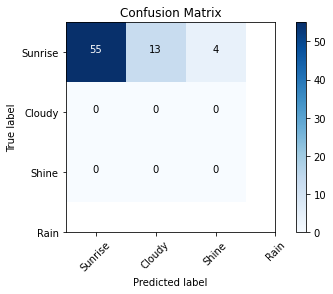

In [137]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['Sunrise', 'Cloudy', 'Shine', 'Rain']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

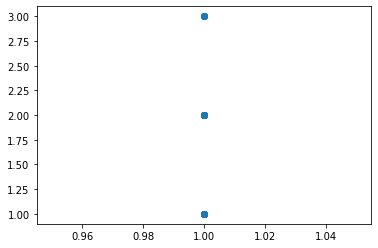

In [138]:
plt.scatter(test_batches.classes, np.argmax(predictions, axis=-1))

In [139]:
os.listdir("./data/weather_dataset/test/Cloudy")

['pic.422.jpg',
 'pic.388.jpg',
 'pic.587.jpg',
 'pic.420.jpg',
 'pic.431.jpg',
 'pic.411.jpg',
 'pic.573.jpg',
 'pic.538.jpg',
 'pic.505.jpg',
 'pic.633.jpg',
 'pic.405.jpg',
 'pic.443.jpg',
 'pic.520.jpg',
 'pic.575.jpg',
 'pic.471.jpg',
 'pic.404.jpg',
 'pic.557.jpg',
 'pic.523.jpg',
 'pic.561.jpg',
 'pic.560.jpg',
 'pic.623.jpg',
 'pic.641.jpg',
 'pic.363.jpg',
 'pic.461.jpg',
 'pic.540.jpg',
 'pic.533.jpg',
 'pic.580.jpg',
 'pic.503.jpg',
 'pic.648.jpg',
 'pic.545.jpg',
 'pic.449.jpg',
 'pic.375.jpg',
 'pic.614.jpg',
 'pic.629.jpg',
 'pic.640.jpg',
 'pic.552.jpg',
 'pic.569.jpg',
 'pic.392.jpg',
 'pic.496.jpg',
 'pic.519.jpg',
 'pic.600.jpg',
 'pic.500.jpg',
 'pic.536.jpg',
 'pic.653.jpg',
 'pic.592.jpg',
 'pic.467.jpg',
 'pic.372.jpg',
 'pic.460.jpg',
 'pic.472.jpg',
 'pic.547.jpg',
 'pic.395.jpg',
 'pic.605.jpg',
 'pic.479.jpg',
 'pic.553.jpg',
 'pic.441.jpg',
 'pic.635.jpg',
 'pic.410.jpg',
 'pic.360.jpg',
 'pic.445.jpg',
 'pic.487.jpg',
 'pic.501.jpg',
 'pic.567.jpg',
 'pic.52